# Wave Equation

## Spencer Halverson

## Math 437

## 11/4/2021

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from scipy import optimize as opt
from IPython.display import HTML

# Problem 1
Numerically approximate the solution to the following BVP

$$
u_{tt} = u_{xx} \\
u(0,t) = u(1,t) = 0, \\
u(x,0) = \sin(2\pi x), \\
u_t(x,0) = 0. 
$$

Numerically approximate the solution $u(x,t)$ for $t\in[0,0.5]$. Use $J=50$ subintervals in the $x$ dimension and $M=50$ subintervals in the $t$ dimension. Animate the results. Compare you results with the analytic solution $u(x,t) = \sin(2\pi x)\cos(2\pi t).$ This function is know as a standing wave.

In [2]:
# lambda = s(deltaT)/(deltaX)
# U^(m+1) = AU^m - U^(m-1)

def wave_solver(s, T, J, M, c, f, g):
    """Solves wave equation BVP: u_tt = (s**2)u_xx
    args: 
        s (float)
        T (float): max time t > 0
        J (int): number of x subintervals (where x goes from 0 to 1)
        M (int): number of t subintervals (where t goes from 0 to T)
        c (float): u(0,t) = u(1, t) = c
        f (func): u(x,0) = f
        g (func): u_t(x, 0) = g
        
    """
    # Initialize variables
    x = np.linspace(0, 1, J+1)
    t = np.linspace(0, T, M+1)
    deltaX = 1/J
    deltaT = T/M
    lamb =  s*(deltaT)/(deltaX)
    # if lamb > 1:
    #     raise ValueError("Lambda is greater than 1, so our method is unstable: {}".format(lamb))

    # compute u0 and u1
    u = []
    u0 = np.zeros(len(x))
    u0[1:J] = f(x[1:J]) 
    u.append(u0)

    u1 = np.zeros(len(x))
    u1[1:J] = u0[1:J] + g(x[1:J])*deltaT + (lamb**2)/2*(u0[0:J-1] - 2*u0[1:J] + u0[2:J+1])
    u.append(u1)

    # compute the rest of the u values
    for step in range(2, M+1): # time step
        # compute A
        A = np.zeros((J-1, J-1))
        np.fill_diagonal(A[1:, :], lamb**2) #lower subdiag
        np.fill_diagonal(A[:, 1:], lamb**2) # upper supdiag
        np.fill_diagonal(A, 2*(1-lamb**2)) # diagonal

        # compute u_next
        u_part = A@u[step-1][1:J] - u[step-2][1:J]
        u_next = np.concatenate(([0], u_part, [0]))
        u.append(u_next)
        
    return x, u

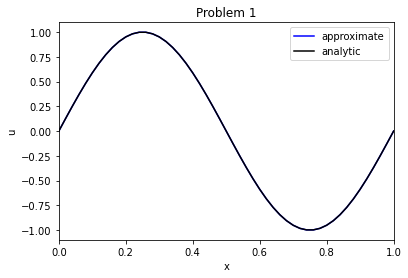

In [3]:
# Problem 1
s = 1
T = 0.5
J = 50
M = 50
c = 0
f = lambda x: np.sin(np.pi*2*x)
g = np.vectorize(lambda x: 0)

x, u = wave_solver(s, T, J, M, c, f, g)
u = np.array(u)
u_max = np.max(u)
u_min = np.min(u)
x_max = np.max(x)
x_min = np.min(x)

fig = plt.figure()
ax = fig.add_subplot(111)

point, = plt.plot([],[], "b-", label= 'approximate')
# also plot true function
true, = plt.plot([], [], 'k-', label="analytic")
true_func = lambda a,b: np.sin(2*np.pi*a)*np.cos(2*np.pi*b)
t = np.linspace(0, T, M+1)

def update(i):
    point.set_data(x, u[i])
    true.set_data(x, true_func(x,t[i]))
    ax.legend(loc='best')
    return point, true

ax.set_xlim((x_min, x_max))
ax.set_ylim((u_min-0.1,u_max+0.1))
ax.set_xlabel("x")
ax.set_ylabel("u")
ax.set_title("Problem 1")

ani = animation.FuncAnimation(fig, update,frames=range(J+1), interval=25)
HTML(ani.to_html5_video())

# save animation
ani.save('prob1_ani.mp4')

In [4]:
# load animation
from base64 import b64encode
mp4 = open('prob1_ani.mp4','rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=400 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)

# Problem 2

Consider the boundary value problem 

$$
u_{tt} = u_{xx}, \\
u(0,t) = u(1,t) = 0, \\
u(x,0) = 0.2e^{-m^2(x-1/2)^2} \\
u_t(x,0) = 0.4m^2(x-\frac{1}{2})e^{-m^2(x-1/2)^2}.
$$

The solution of this problem is ta Gaussian pulse. It travels to the right at a constant speed. This solution models, for example, a wave pulse in a stretched string. Note that the fixed boundary conditions reflect the pulse back when it meets the boundary.

Numerically approximate the solution $u(x,t)$ for $t\in[0,1]$. Set $m=20$. Use 200 subintervals in space and 220 in time, and animate your results. Then use 200 subintervals in space and 180 in time, and animate your results. Note that the stability condition is not satisfied for the second mesh.

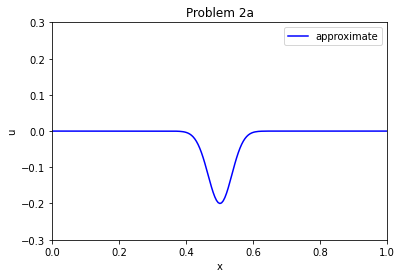

In [5]:
# Problem 2 (part 1)

# initial conditions
m = 20
s = 1
T = 1
J = 200 # subintervals in space
M = 220 # subintervals in time
c = 0
f = np.vectorize(lambda x: 0.2*np.exp(-1*(m**2)*((x-1/2)**2)))
g = np.vectorize(lambda x: 0.4*(m**2)*(x-1/2)*np.exp(-1*(m**2)*((x-1/2)**2)))

x, u = wave_solver(s, T, J, M, c, f, g)
u = np.array(u)
u_max = np.max(u)
u_min = np.min(u)
x_max = np.max(x)
x_min = np.min(x)

fig = plt.figure()
ax = fig.add_subplot(111)

point, = plt.plot([],[], "b-", label= 'approximate')
# also plot true function
# true, = plt.plot([], [], 'k-', label="analytic")
# true_func = lambda a,b: np.sin(2*np.pi*a)*np.cos(2*np.pi*b)
# t = np.linspace(0, T, M+1)

def update(i):
    point.set_data(x, u[i])
    # true.set_data(x, true_func(x,t[i]))
    ax.legend(loc='best')
    return point, true

ax.set_xlim((x_min, x_max))
ax.set_ylim((u_min-0.1,u_max+0.1))
ax.set_xlabel("x")
ax.set_ylabel("u")
ax.set_title("Problem 2a")

ani = animation.FuncAnimation(fig, update,frames=range(M+1), interval=25)
HTML(ani.to_html5_video())

# save animation
ani.save('prob2a_ani.mp4')


# Problem 2 (part 2)

# initial conditions
m = 20
s = 1
T = 1
J = 200 # subintervals in space
M = 180 # subintervals in time
c = 0
f = np.vectorize(lambda x: 0.2*np.exp(-1*(m**2)*((x-1/2)**2)))
g = np.vectorize(lambda x: 0.4*(m**2)*(x-1/2)*np.exp(-1*(m**2)*((x-1/2)**2)))

x, u = wave_solver(s, T, J, M, c, f, g)
u = np.array(u)
u_max = np.max(u)
u_min = np.min(u)
x_max = np.max(x)
x_min = np.min(x)

fig = plt.figure()
ax = fig.add_subplot(111)

point, = plt.plot([],[], "b-", label= 'approximate')
# also plot true function
# true, = plt.plot([], [], 'k-', label="analytic")
# true_func = lambda a,b: np.sin(2*np.pi*a)*np.cos(2*np.pi*b)
# t = np.linspace(0, T, M+1)

def update(i):
    point.set_data(x, u[i])
    # true.set_data(x, true_func(x,t[i]))
    ax.legend(loc='best')
    return point, true

# ax.set_xlim((x_min, x_max))
# ax.set_ylim((u_min-0.1,u_max+0.1))
ax.set_xlabel("x")
ax.set_ylabel("u")
ax.set_title("Problem 2b")

ani = animation.FuncAnimation(fig, update,frames=range(M+1), interval=25)
HTML(ani.to_html5_video())

# save animation
ani.save('prob2b_ani.mp4')

In [6]:
# load animation
from base64 import b64encode
mp4 = open('prob2a_ani.mp4','rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=400 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)

In [7]:
# load animation
from base64 import b64encode
mp4 = open('prob2b_ani.mp4','rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=400 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)

# Problem 3

Consider the initial boundary value problem
$$
	u_{tt} = u_{xx}, \\
	u(0,t) = u(1,t) = 0, \\
	u(x,0) = 0.2e^{-m^2(x-1/2)^2}\\
	u_t(x,0) = 0.
$$
The initial condition separates into two smaller, slower-moving pulses, one travelling to the right and the other to the left.
This solution models, for example, a plucked guitar string

Numerically approximate the solution $u(x,t)$ for $t \in \left[0,2\right]$.
Set $m=20$.
Use 200 subintervals in space and 440 in time, and animate your results.
It is rather easy to see that the solution to this problem is the sum of two travelling waves, one travelling to the left and the other to the right, as described earlier.

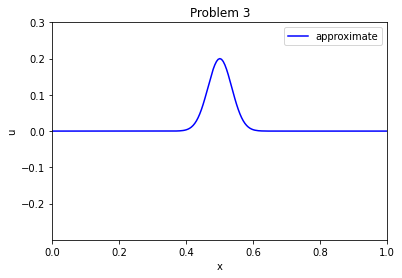

In [8]:
# Problem 3

# initial conditions
m = 20
s = 1
T = 2
J = 200 # subintervals in space
M = 440 # subintervals in time
c = 0
f = np.vectorize(lambda x: 0.2*np.exp(-1*(m**2)*((x-1/2)**2)))
g = np.vectorize(lambda x: 0)

x, u = wave_solver(s, T, J, M, c, f, g)
u = np.array(u)
u_max = np.max(u)
u_min = np.min(u)
x_max = np.max(x)
x_min = np.min(x)

fig = plt.figure()
ax = fig.add_subplot(111)

point, = plt.plot([],[], "b-", label= 'approximate')
# also plot true function
# true, = plt.plot([], [], 'k-', label="analytic")
# true_func = lambda a,b: np.sin(2*np.pi*a)*np.cos(2*np.pi*b)
# t = np.linspace(0, T, M+1)

def update(i):
    point.set_data(x, u[i])
    # true.set_data(x, true_func(x,t[i]))
    ax.legend(loc='best')
    return point, true

ax.set_xlim((x_min, x_max))
ax.set_ylim((u_min-0.1,u_max+0.1))
ax.set_xlabel("x")
ax.set_ylabel("u")
ax.set_title("Problem 3")

ani = animation.FuncAnimation(fig, update,frames=range(M+1), interval=25)
HTML(ani.to_html5_video())

# save animation
ani.save('prob3_ani.mp4')

In [9]:
# load animation
from base64 import b64encode
mp4 = open('prob3_ani.mp4','rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=400 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)

# Problem 4

Consider the initial boundary value problem

$$
	u_{tt} = u_{xx}, \\
	u(0,t) = u(1,t) = 0, \\
	u(x,0) = \begin{cases} 1/3 & \text{if } 5/11 < x < 6/11,\\
	0 & \text{otherwise}
	\end{cases}\\
	u_t(x,0) = 0.
$$

Numerically approximate the solution $u(x,t)$ for $t \in \left[0, 2\right]$.
Use 200 subintervals in space and 440 in time, and animate your results.
Even though the method is second order and stable for this discretization, since the initial condition is discontinuous there are large dispersive errors.

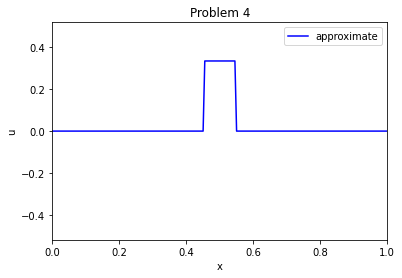

In [10]:
# Problem 4

# initial conditions
s = 1
T = 2
J = 200 # subintervals in space
M = 440 # subintervals in time
c = 0
f = lambda x: 1/3 * (x > 5/11)* (x < 6/11)
g = np.vectorize(lambda x: 0)

x, u = wave_solver(s, T, J, M, c, f, g)
u = np.array(u)
u_max = np.max(u)
u_min = np.min(u)
x_max = np.max(x)
x_min = np.min(x)

fig = plt.figure()
ax = fig.add_subplot(111)

point, = plt.plot([],[], "b-", label= 'approximate')
# also plot true function
# true, = plt.plot([], [], 'k-', label="analytic")
# true_func = lambda a,b: np.sin(2*np.pi*a)*np.cos(2*np.pi*b)
# t = np.linspace(0, T, M+1)

def update(i):
    point.set_data(x, u[i])
    # true.set_data(x, true_func(x,t[i]))
    ax.legend(loc='best')
    return point, true

ax.set_xlim((x_min, x_max))
ax.set_ylim((u_min-0.1,u_max+0.1))
ax.set_xlabel("x")
ax.set_ylabel("u")
ax.set_title("Problem 4")

ani = animation.FuncAnimation(fig, update,frames=range(M+1), interval=25)
HTML(ani.to_html5_video())

# save animation
ani.save('prob4_ani.mp4')

In [11]:
# load animation
from base64 import b64encode
mp4 = open('prob4_ani.mp4','rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=400 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)

# Problem 5


Numerically solve the initial value problem

$$
	u_t -su_x + uu_x = u_{xx}, \quad x \in (-\infty,\infty),\\
	u(x,0) = v(x),
$$

for $t \in [0,1]$.
Let the perturbation $v(x)$ be given by

$$
v(x) = 3.5(\sin{(3x)} + 1)\frac{1}{\sqrt{2\pi}} \exp{(-x^2/2)}
$$

And let the initial condition be $u(x, 0) = \hat{u}(x) + v(x)$
Approximate the $x$ domain,$(-\infty, \infty)$, numerically by the finite interval $[-20,20]$, and fix $u(-20) = u_-$, $u(20) = u_+$. Let $u_- = 5$, $u_+ = 1$.
Use 150 intervals in space and 350 steps in time.
Animate your results.
You should see the solution converge to a translate of the travelling wave $\hat{u}$.

Hint: This difference scheme is no longer a linear equation.
We have a nonlinear equation in $U^{n+1}$.
We can still solve this function using Newton's method or some other similar solver.
In this case, use `scipy.optimize.fsolve`.

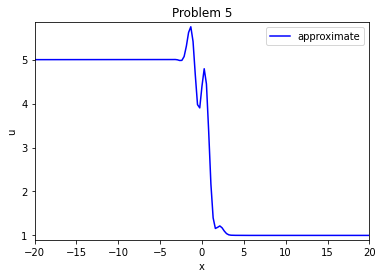

In [12]:
def burger_solve(T=1, J=150, M=350, 
                 v = np.vectorize(lambda x: 3.5*(np.sin(3*x) + 1)*(1/(np.sqrt(2*np.pi)))*np.exp(-1*(x**2)/2)),
                 xmin=-20, xmax=20, 
                 u_minus=5, u_plus=1, nu=1, delta=0.00):
    """Solves wave equation BVP: u_t - s*u_x + u*u_x = u_xx
    args: 
        s (float)
        T (float): max time t > 0
        J (int): number of x subintervals (where x goes from xmin to xmax)
        M (int): number of t subintervals (where t goes from 0 to T)
        v (func): u(x,0) = v
        xmin (float): min x value on the interval we want to approximate
        xmax (float): max x value on the interval
        u_minus (float): u(xmin) = u(-1*infinity) = u_minus
        u_plus (float): u(xmax) = u(infinity) = u_plus
        nu (float): parameter that we set to 1
        delta (float): parameter that we set to 0, or 0.01 if zero breaks the code
        
    """
    s = (u_minus + u_plus)/2
    assert s == 3, "s should be equal to 3"

    a = (u_minus - u_plus)/2 
    assert a == 2, "a should be equal to 2"

    u_hat = np.vectorize(lambda x: s - a*np.tanh(a*x/(2*nu) + delta))

    # Initialize variables
    T = 1
    J = 150 # space steps
    M = 350 # time steps
    x = np.linspace(xmin, xmax, J+1) # this is approximating negative infinity to infinity
    t = np.linspace(0, T, M+1)
    deltaX = (xmax-xmin)/J
    deltaT = T/M

    # create implicit function to solve
    def func(x, u0, s, deltaT, deltaX):
        K1 = deltaT/(4*deltaX)
        K2 = deltaT/(2*(deltaX**2))
        J = len(x) - 1
        answer = np.zeros(len(x))
        answer += x
        answer -= u0
        answer[1:J] -= K1*((s-x[1:J])*(x[2:]-x[:J-1]) + (s-u0[1:J])*(u0[2:]-u0[:J-1])) 
        answer[1:J] -= K2*((x[2:] - 2*x[1:J] + x[:J-1]) + (u0[2:] - 2*u0[1:J] + u0[:J-1]))
        # answer[0] = u0[0]
        # answer[-1] = u0[-1]
        return answer

    # compute u0 and u1
    u = []
    u0 = np.zeros(len(x))
    u0[1:J] = v(x[1:J]) + u_hat(x[1:J])
    u0[0] = u_minus
    u0[-1] = u_plus
    u.append(u0)

    for step in range(M):
        guess = u[-1]
        u_next = opt.fsolve(func, guess, args=(u[-1], s, deltaT, deltaX))
        # print(np.isclose(func(u_next, u[-1], s, deltaT, deltaX), np.zeros(len(u_next))))
        # u_next[0] = u_minus
        # u_next[-1] = u_plus
        u.append(u_next)
    
    return x, u

# v = np.vectorize(lambda x: 3.5*(np.sin(3*x) + 1)*(1/(np.sqrt(2*np.pi)))*np.exp(-1*(x**2)/2))
M = 350
x, u = burger_solve()
# print(u[:3])

u = np.array(u)
u_max = np.max(u)
u_min = np.min(u)
x_max = np.max(x)
x_min = np.min(x)

fig = plt.figure()
ax = fig.add_subplot(111)

point, = plt.plot([],[], "b-", label= 'approximate')
# also plot true function
# true, = plt.plot([], [], 'k-', label="analytic")
# true_func = lambda a,b: np.sin(2*np.pi*a)*np.cos(2*np.pi*b)
# t = np.linspace(0, T, M+1)

def update(i):
    point.set_data(x, u[i])
    # true.set_data(x, true_func(x,t[i]))
    ax.legend(loc='best')
    return point

ax.set_xlim((x_min, x_max))
ax.set_ylim((u_min-0.1,u_max+0.1))
ax.set_xlabel("x")
ax.set_ylabel("u")
ax.set_title("Problem 5")

ani = animation.FuncAnimation(fig, update,frames=range(M+1), interval=25)
HTML(ani.to_html5_video())

# save animation
ani.save('prob5_ani.mp4')
    
    

In [13]:
# load animation
from base64 import b64encode
mp4 = open('prob5_ani.mp4','rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=400 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)